In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn import linear_model

In [16]:
insurance_df = pd.read_csv("./datasets/insurance.csv")

In [17]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# Look at datatypes
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Data Cleaning

In [19]:
# Check for missing values
insurance_df.isnull().any().any()

False

In [20]:
# Check for duplicates
len(insurance_df[insurance_df.duplicated()])

1

In [21]:
# Drop the single duplicate since unlikely to have exact charge/bmi/region/age etc.
len_before = len(insurance_df)
insurance_df.drop_duplicates(keep='first', inplace=True)
len_after = len(insurance_df)
print(f"Before drop {len_before}, after drop {len_after}")

Before drop 1338, after drop 1337


In [24]:
# Reset index
insurance_df.reset_index(drop=True, inplace=True)

# EDA

In [39]:
insurance_df['sex'].value_counts()
insurance_df['children'].value_counts()
insurance_df['smoker'].value_counts()
np.sort(insurance_df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=int64)

In [46]:
sns.set(style="ticks", color_codes=True)

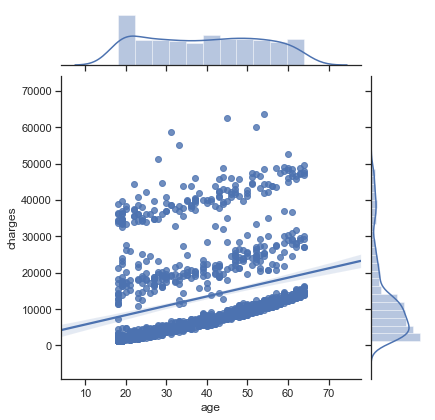

In [47]:
sns.jointplot(x="age", y="charges", data=insurance_df, kind="reg")

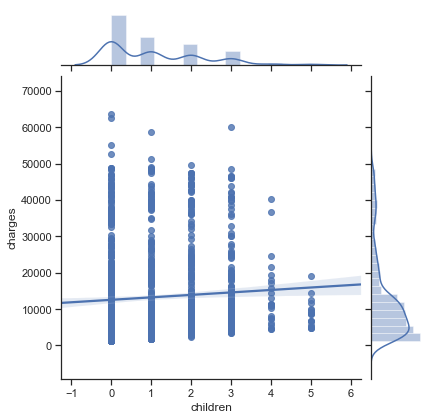

In [48]:
sns.jointplot(x="children", y="charges", data=insurance_df, kind="reg")

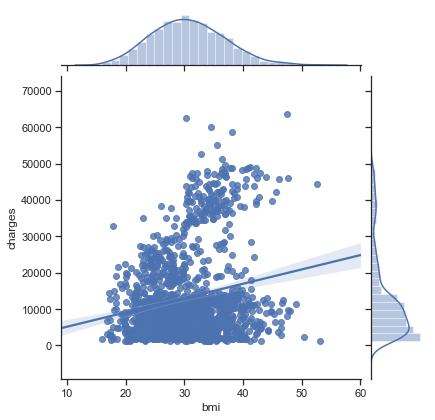

In [49]:
sns.jointplot(x="bmi", y="charges", data=insurance_df, kind="reg")

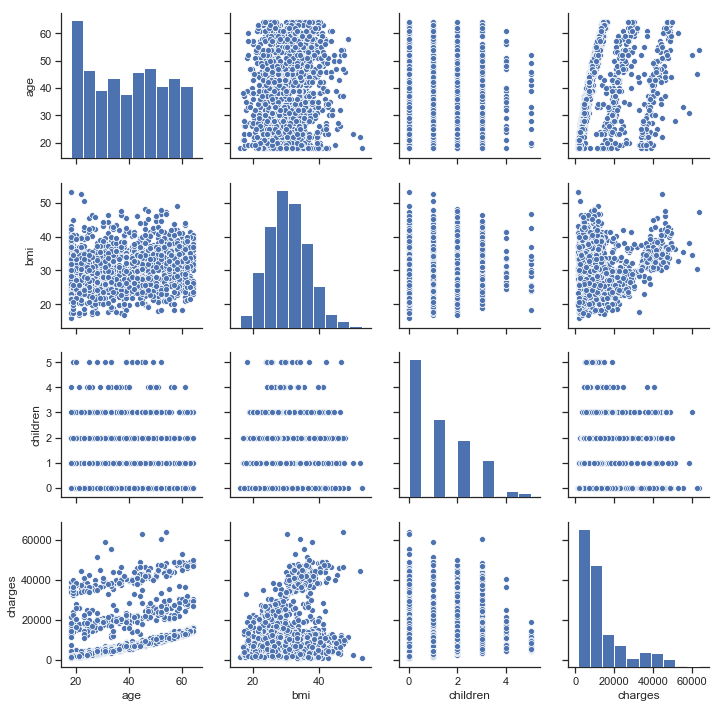

In [50]:
sns.pairplot(insurance_df)

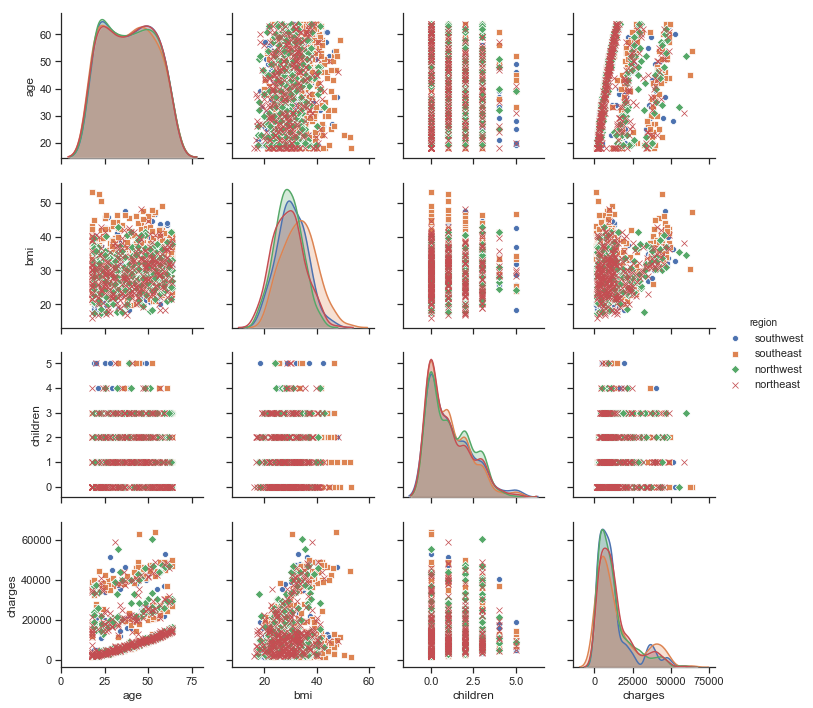

In [52]:
sns.pairplot(insurance_df, hue="region", markers=["o", "s", "D", "x"])

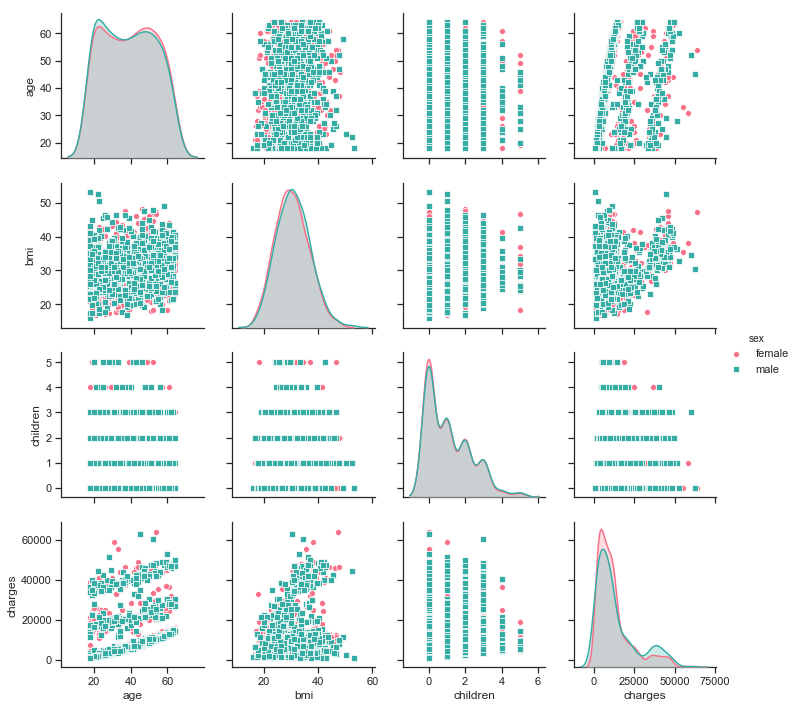

In [53]:
sns.pairplot(insurance_df, hue="sex", palette="husl", markers=["o", "s"])

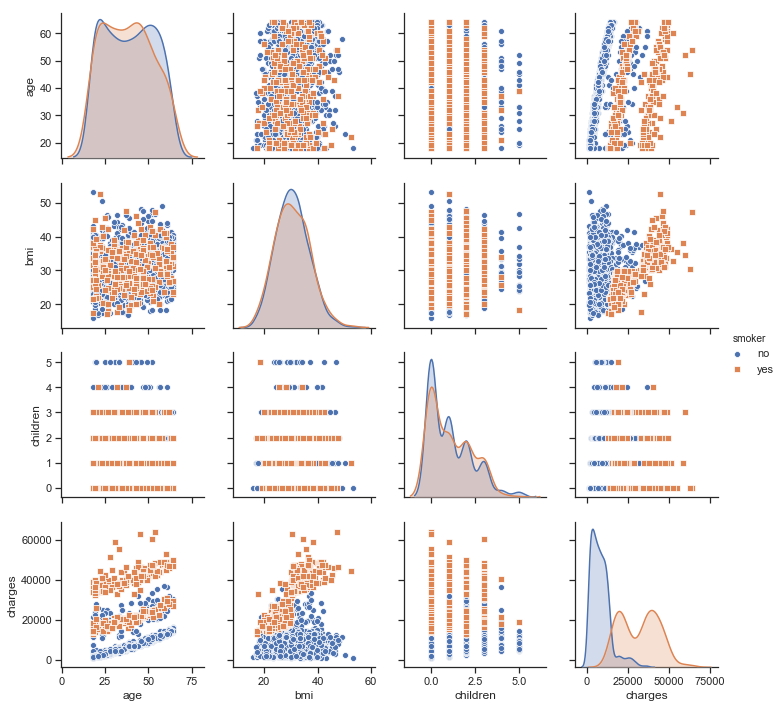

In [59]:
sns.pairplot(insurance_df, hue="smoker", markers=["o", "s"])

In [57]:
# Let's convert object to categorical for sex, smoker, region
insurance_df['sex'] = insurance_df['sex'].astype('category')
insurance_df['smoker'] = insurance_df['smoker'].astype('category')
insurance_df['region'] = insurance_df['region'].astype('category')

In [58]:
insurance_df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [60]:
insurance_model_df = insurance_df.copy()

In [66]:
dummies = pd.get_dummies(insurance_model_df[insurance_model_df.select_dtypes(['category']).columns])

In [67]:
insurance_model_df = pd.concat([insurance_model_df, dummies], axis=1)

In [69]:
insurance_model_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

# Explore a simple linear regression model

In [70]:
X = insurance_model_df[['age','bmi', 'children', 'sex_male', 'smoker_yes', 'region_northeast',
       'region_northwest', 'region_southeast']]
Y = insurance_model_df['charges']

In [71]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -12896.63889267892
Coefficients: 
 [  256.76461078   339.2503637    474.8204855   -129.48147837
 23847.32884379   960.08138547   610.85485391   -75.18421629]


In [74]:
model = sm.OLS(Y, X).fit()

In [75]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 18 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:31:46   Log-Likelihood:                -13614.
No. Observations:                1337   AIC:                         2.724e+04
Df Residuals:                    1329   BIC:                         2.729e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                202.7425     11.761  